In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import joblib
import os
import pandas as pd

# Load dataset
BASE_DIR=os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath(os.getcwd()))))
csv_path = os.path.join(BASE_DIR,"data", "processed", "BayNet_Ensemple_data.csv")
model_dir = os.path.join(BASE_DIR,"models", "trained")

df = pd.read_csv(csv_path)

# Features and labels
X = df.drop('cost', axis=1)
y = df['cost']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3661
           1       1.00      0.99      1.00      3607
           2       1.00      0.99      1.00      3607
           3       0.99      0.99      0.99      3580
           4       0.99      0.99      0.99      3674

    accuracy                           0.99     18129
   macro avg       0.99      0.99      0.99     18129
weighted avg       0.99      0.99      0.99     18129



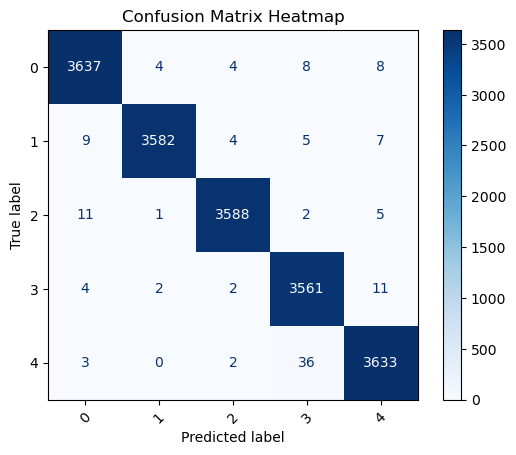

In [2]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

print(classification_report(y_test, rf_preds))
cm = confusion_matrix(y_test, rf_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix Heatmap")
plt.show()

              precision    recall  f1-score   support

           0       0.26      0.18      0.21      3661
           1       0.38      0.26      0.31      3607
           2       0.46      0.43      0.44      3607
           3       0.30      0.30      0.30      3580
           4       0.31      0.51      0.38      3674

    accuracy                           0.34     18129
   macro avg       0.34      0.34      0.33     18129
weighted avg       0.34      0.34      0.33     18129



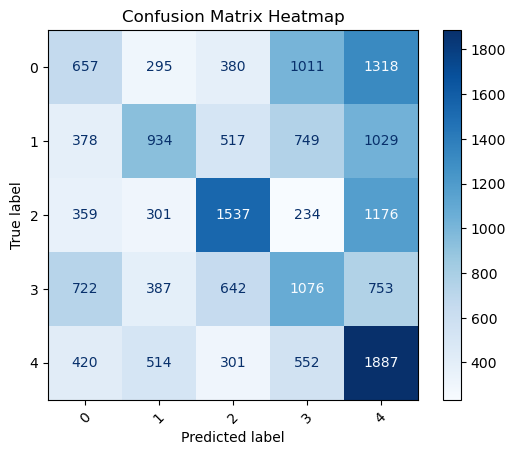

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      3661
           1       0.94      0.92      0.93      3607
           2       0.93      0.91      0.92      3607
           3       0.90      0.95      0.92      3580
           4       0.87      0.93      0.90      3674

    accuracy                           0.92     18129
   macro avg       0.92      0.92      0.92     18129
weighted avg       0.92      0.92      0.92     18129



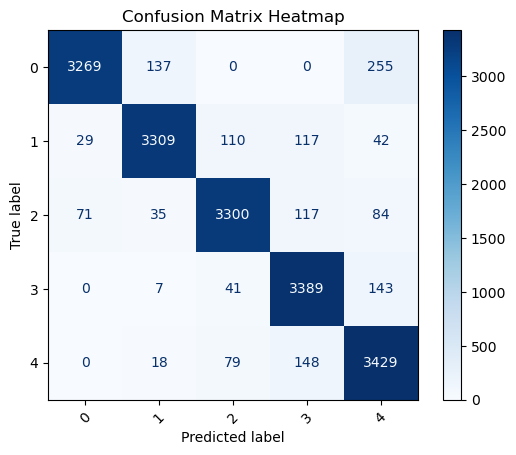

In [3]:
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
ada_preds = ada.predict(X_test)
print(classification_report(y_test, ada_preds))
cm = confusion_matrix(y_test, ada_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ada.classes_)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix Heatmap")
plt.show()

# Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
gb_preds = gb.predict(X_test)

print(classification_report(y_test, gb_preds))
cm = confusion_matrix(y_test, gb_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gb.classes_)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix Heatmap")
plt.show()

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      3661
           1       0.91      0.87      0.89      3607
           2       0.88      0.92      0.90      3607
           3       0.88      0.83      0.85      3580
           4       0.83      0.89      0.86      3674

    accuracy                           0.87     18129
   macro avg       0.87      0.87      0.87     18129
weighted avg       0.87      0.87      0.87     18129



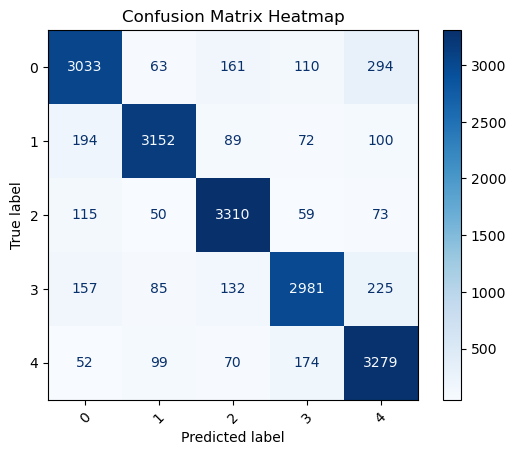

In [4]:
log_clf = LogisticRegression()
svc_clf = SVC(probability=True)
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rf), ('svc', svc_clf)],
    voting='soft'  # 'hard' for majority voting
)
voting_clf.fit(X_train, y_train)
voting_preds = voting_clf.predict(X_test)

print(classification_report(y_test, voting_preds))
cm = confusion_matrix(y_test, voting_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=voting_clf.classes_)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix Heatmap")
plt.show()

In [5]:
os.makedirs(model_dir, exist_ok=True)

# Save models
joblib.dump(rf, os.path.join(model_dir, "Random_Forest.pkl"))
joblib.dump(ada, os.path.join(model_dir, "AdaBoost.pkl"))
joblib.dump(voting_clf, os.path.join(model_dir, "voting_classifier.pkl"))

['d:\\year 3\\hk2\\Machine Learning\\ML-LearningMachine\\models\\trained\\voting_classifier.pkl']